**Instructor: Parijat Dube**

Modifed 02-28-2023 by Li Shen

# Problem 1 - *Convolutional Neural Networks Architectures*   (40 points)

In this problem we will study and compare different convolutional neural
network architectures. We will calculate number of parameters (weights,
to be learned) and memory requirement of each network. We will also
analyze inception modules and understand their design.

1.  VGG (Simonyan et al.) has an extremely homogeneous architecture that only performs 3x3 convolutions with stride 1 and pad 1 and 2x2 max pooling with stride 2 (and no padding) from the beginning to the end. However VGGNet is very expensive to evaluate and uses a lot more memory and parameters. Refer to VGG19 architecture on page 3 in Table 1 of the paper by Simonyan et al. (see references at the end of the problem) You need to complete Table 1 below for calculating activation units and parameters at each layer in VGG19 (without counting biases). Its been partially filled for you. Round to K and M for memory, you don't need to be exact. **(10 points)**


### Table 1

| Layer      | Number of Activations \(Memory\) | Parameters \(Compute\)         |
|------------|----------------------------------|--------------------------------|
| Input      | 224\*224\*3=150K                 | 0                              |
| CONV3\-64  | 224\*224\*64=3\.2M               | \(3\*3\*3\)\*64 = 1,728        |
| CONV3\-64  | 224\*224\*64=3\.2M               | \(3\*3\*64\)\*64 = 36,864      |
| POOL2      | 112\*112\*64=800K                | 0                              |
| CONV3\-128 | 112\*112\*128=1.6M     |      (3\*3\*64)*128 = 73,728       | 
| CONV3\-128 | 112\*112\*128=1.6M                 |    (3\*3\*128)*128 = 147,456      |
| POOL2      | 56\*56\*128=400K                 | 0                              |
| CONV3\-256 |  56\*56\*256=800K                  |    (3\*3\*128)*256 = 294,912     |
| CONV3\-256 | 56\*56\*256=800K                 | \(3\*3\*256\)\*256 = 589,824   |
| CONV3\-256 |  56\*56\*256=800K                  |    (3\*3\*256)*256 = 589,824  |
| CONV3\-256 |56\*56\*256=800K                  |  (3\*3\*256)*256 = 589,824      |
| POOL2      |  28\*28\*256=200K                 | 0                              |
| CONV3\-512 | 28\*28\*512=400K                 | \(3\*3\*256\)\*512 = 1,179,648 |
| CONV3\-512 |  28\*28\*512=400K                  |  (3\*3\*512)*512 = 2,359,296    |
| CONV3\-512 | 28\*28\*512=400K                 | (3\*3\*512)*512 = 2,359,296      |
| CONV3\-512 | 28\*28\*512=400K                   | (3\*3\*512)*512 = 2,359,296      |
| POOL2      | 14\*14\*512=100K                    | 0                              |
| CONV3\-512 | 14\*14\*512=100K                   |  (3\*3\*512)*512 = 2,359,296      |
| CONV3\-512 | 14\*14\*512=100K                   | (3\*3\*512)*512 = 2,359,296      |
| CONV3\-512 | 14\*14\*512=100K                  |  (3\*3\*512)*512 = 2,359,296       |
| CONV3\-512 |14\*14\*512=100K                  | (3\*3\*512)*512 = 2,359,296        |
| POOL2      |   7\*7\*512=25K                 | 0                              |
| FC         | 4096                             |    7\*7\*512\*4096 = 102,760,448  |
| FC         | 4096                             | 4096\*4096 = 16,777,216        |
| FC         | 1000                             |    4096\*1000 = 4,096,000     |
| TOTAL      |   24M                               |  144M                              | 


2.  VGG architectures have smaller filters but deeper networks compared to Alexnet (3x3 compared to 11x11 or 5x5). What is the receptive field of a stack of 2 convolution layers each of filter size 3x3? What about a stack of 3 convolution layers? **(4 points)**. 

  - The receptive field of a stack of 2 layers with filter 3x3 is 5x5. The receptive field with 3 layers is 7x7.

3.  (**Optional**) Can you find a general formula to calculate the receptive field for $N$ stacks of convolution layers each of filter size $F×F$? **(5 bonus points)**

  - field = 2\*filter_size - n_layer  + 1 \
  - field (2 layers) = 2*3 - 2 + 1 = 5 \
  - field (3 layers) = 3*3 - 3 + 1 = 7

4.  The original Googlenet paper (Szegedy et al.) proposes two architectures for Inception module, shown in Figure 2 on page 5 of the paper, referred to as naive and dimensionality reduction respectively.

    1.  What is the general idea behind designing an inception module (parallel convolutional filters of different sizes with a pooling followed by concatenation) in a convolutional neural network?  **(3 points)**

    - CNN performance is greater when the networks are larger, so parallel filters allow greater network complexity as well as greater training efficiency. Filters of different sizes will extract features at different levels. Having multiple scales of learning in a network can help the network learn more. 

    2.  Assuming the input to inception module (referred to as \"previous layer\" in Figure 2 of the paper) has size 32x32x256, calculate the output size after filter concatenation for the naive and dimensionality reduction inception architectures with number of filters given in Figure 1.  **(4 points)**

  - Naive: 32\*32\*672 = (32\*32\*(128+192+96+256))
  - Dimensionality Reduction: 32\*32\*480 = (128+192+96+64)

    3.  Next calculate the total number of convolutional operations for each of the two inception architecture again assuming the input to the module has dimensions 32x32x256 and number of filters given in Figure 1. **(4 points)**

  - Naive: (32\*32\*128\*1\*1\*256) + (32\*32\*192\*3\*3\*256) + (32\*32\*96\*5\*5\*256)+(3\*3\*256) = 1115687168
  - Dimension Reduction: (32\*32\*128\*1\*1\*256)+(32\*32\*32\*1\*1\*256)+(3\*3\*256)+(32\*32\*128\*1\*1\*256)+(32\*32\*128\*3\*3\*192)+(32\*32\*32\*5\*5\*96)+(3\*3\*256\*1\*1\*64) = 380782848

    4.  Based on the calculations above explain the problem with naive architecture and how dimensionality reduction architecture helps (*Hint: compare computational complexity*). How much is the computational saving?  **(3 points)**

    - Naive architecture has a higher computational complexity because each convolutional layer has to convolve over all 32*32*256 layers. Dimensionality reduction allows the model to have the same amount of complexity, without having such a large computational burden. The dimensionality reduction approach is much more computationally efficient, saving 734904320 in computational complexity. Adding 1x1 convolutions reduce dimensionality before 3x3 and 5x5 convolutions. 

### Figure 1
Two types of inception module with number of filters and
input size for calculation in Question 3.4(b) and 3.4(c).

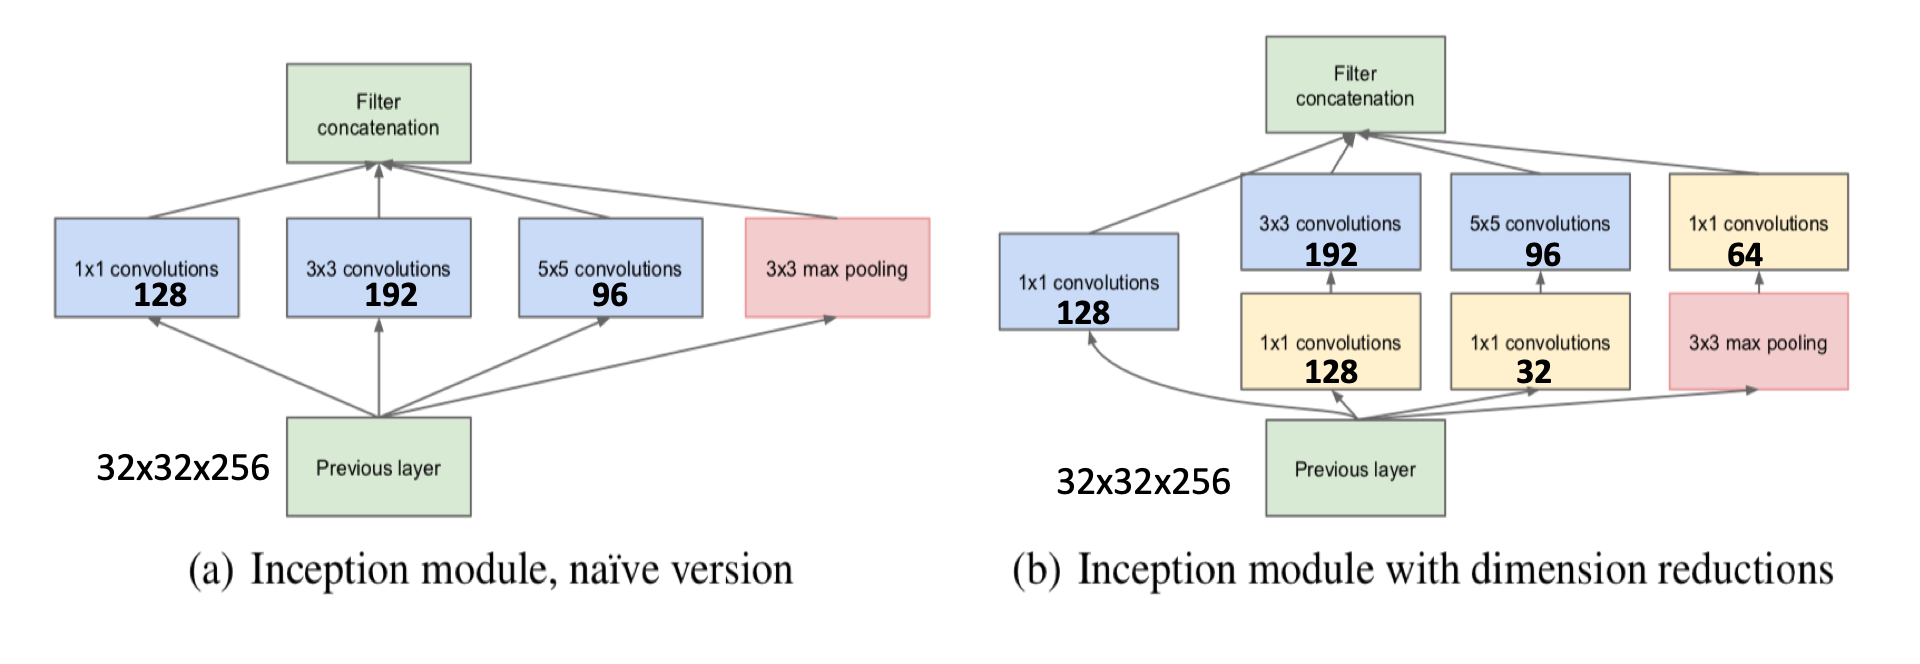

5.  Faster-RCNN is a CNN based architecture for object detection which is much faster that Fast-RCNN. Read about Faster RCNN in [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497) and answer the following questions:

    1.  What is the main difference between Fast-RCNN and Faster-RCNN that resulted in faster detection using Faster-RCNN? **(3 points)**

  - Faster-RCNN merges Fast-RCNN and and Region proposal network (RPN) to add an 'attention' component to Fast-RCNN. 

    2.  What is Region Proposal Network (RPN)? Briefly explain its architecture. **(3 points)**

    - RPNs are convolutional networks that simultaneously predict bounds and scores at each convolution position. The RPN generates region proposals for the Fast-RCNN to speed up detection. It's architechture consists of a feature map convolved into an intermediate layer, then split into a regression layer and a classification layer. 

    3.  Explain how are region proposals generated from RPN. **(3 points)**

  - First a small network is slid over the feature map from the previous layer. Then, each window is mapped to a lower dimensional feature (intermediate layer). This is then fed into two fully-connected sibling layers (regression and classification). 

    4.  There is a lot of overlap in the region proposals generated by RPN. What technique is used in Faster-RCNN to reduce the number of proposals to roughly 2000? **(3 points)**

  - Faster-RCNN uses non-maximum supression using their classification scores. The IoU(intersection over union) score is set to a 0.7 threshold to reduce proposed regions to ~2000 per image. Then top ranked proposed regions are used for detection. 

***References:***

-   (Alexnet) Alex Krizhevsky et al. ImageNet Classification with Deep
    Convolutional Neural Networks.\
    Paper available at
    <https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf>

-   (VGG) Karen Simonyan et al. Very Deep Convolutional Networks for
    Large-scale Image Recognition. Paper available at
    <https://arxiv.org/pdf/1409.1556.pdf>

-   (Googlenet) Christian Szegedy et al. Going deeper with
    convolutions.\
    Paper available at <https://arxiv.org/pdf/1409.4842.pdf>

# Problem 2 - *Building an image classifier using CIFAR10*   (**30 points**)

*Theoretical questions are identified by **Q$<$number$>$** while coding exercises are identified by **C$<$number$>$**.*\
In this part of the lab we create a Neural Network in PyTorch to classify a dataset of images. The dataset we are going to use is CIFAR10, which contains 50K 32$\times$32 color images in the train set.

The model we are going to build is ResNet-18, as described in [**Deep Residual Learning for Image Recognition**](https://arxiv.org/abs/1512.03385). The reference code is at [**pytorch-cifar**](https://github.com/kuangliu/pytorch-cifar).

Split the train set 50-50 into train and validation sets. Use the following sequence of transformations for the train set:

1.  Random cropping, with size 32$\times$32 and padding 4.
2.  Random horizontal flipping with a probability 0.5.
3.  Normalize each image's RGB channel with mean (0.4914, 0.4822, 0.4465) and variance (0.2023, 0.1994, 0.2010).

For the test set, use only the normalization for transformation. For all *DataLoaders*, use a minibatch size of 128 and 3 IO processes (i.e., *num$\_$workers=*2).

Create a ResNet-18 model as defined in [**Deep Residual Learning for Image Recognition**](https://arxiv.org/abs/1512.03385) based on the [reference code](https://github.com/kuangliu/pytorch-cifar). Specifically, the first convolutional layer should have 3 input channels, 64 output channels, 3$\times$3 kernel, with *stride=*1 and *padding=*1. Followed by 8 basic blocks in 4 sub groups (i.e. 2 basic blocks in each subgroup):

-   The first sub-group contains convolutional layer with 64 output channels, 3$\times$3 kernel, *stride=*1, *padding=*1.
-   The second sub-group contains convolutional layer with 128 output channels, 3$\times$3 kernel, *stride=*2, *padding=*1.
-   The third sub-group contains convolutional layer with 256 output channels, 3$\times$3 kernel, *stride=*2, *padding=*1.
-   The forth sub-group contains convolutional layer with 512 output channels, 3$\times$3 kernel, *stride=*2, *padding=*1.
-   The final output.

For all convolutional layers, use ReLU activation functions, and use batch-norm layers to avoid covariate shift. Since batch-norm layers regularize the training, set bias to 0 for all the convolutional layers. Use SGD optimizers with 0.1 as the learning rate, momentum 0.9, weight decay 5e-4. The loss function is cross entropy.

### C1: Training in PyTorch (10 points)
Train the ResNet-18 model for 10 epochs on GPU, plot the train and validation loss and accuracy vs. epoch number. After training, evaluate the saved best model on the test set.
**Note:** No need to write your own ResNet module from scratch, you can re-use as much code as you want from the above-mentioned github repository. 

In [ ]:
'''Train CIFAR10 with PyTorch.'''
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import numpy as np
#from models import *
#from utils import progress_bar

In [ ]:
# Getting CIFAR10 Data ()
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(), #default=0.5
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#loading train set
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)


# Split the training dataset into training and validation sets
train_size = int(0.5 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True,
                                        num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
'''ResNet in PyTorch.
For Pre-activation ResNet, see 'preact_resnet.py'.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
https://github.com/kuangliu/pytorch-cifar/blob/master/main.py
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

#Defining resnet model from https://github.com/kuangliu/pytorch-cifar/tree/master/models

In [ ]:
#Addtionally, if you run into trouble with the learning rate of 0.1, e.g. the optimizer overshoots the target, you can decrease the learning rate as needed.

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Model
net = ResNet18()

net = net.to(device)

if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=5e-4)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
#adjusts learning rate according to schedule to help converge quickly
#https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863


In [ ]:
def init_params(net):
    '''Init layer parameters.'''
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            init.kaiming_normal(m.weight, mode='fan_out')
            if m.bias:
                init.constant(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            init.constant(m.weight, 1)
            init.constant(m.bias, 0)
        elif isinstance(m, nn.Linear):
            init.normal(m.weight, std=1e-3)
            if m.bias:
                init.constant(m.bias, 0)

In [ ]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    # Save checkpoint.
    acc = 100.*correct/total
    state = {'net': net.state_dict(),
            'acc': acc,
             'loss': loss,
            'epoch': epoch}

    return train_loss,acc

In [ ]:
# Training
def train_val(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    val_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(valloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        val_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    # Save checkpoint.
    acc = 100.*correct/total
    state = {'net': net.state_dict(),
            'acc': acc,
            'loss': val_loss,
            'epoch': epoch}
    return val_loss,acc

In [ ]:
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
res1_dict = {}

for epoch in range(start_epoch, start_epoch+10):
    tr_loss,tr_acc = train(epoch)
    val_loss, val_acc = train_val(epoch)
    res1_dict[epoch] = epoch
    res1_dict[str(epoch)+' tr_loss'] = tr_loss
    res1_dict[str(epoch)+' tr_acc'] = tr_acc
    res1_dict[str(epoch)+' val_loss'] = val_loss
    res1_dict[str(epoch)+' val_acc'] = val_acc
    scheduler.step()


Epoch: 0

Epoch: 0

Epoch: 1

Epoch: 1

Epoch: 2

Epoch: 2

Epoch: 3

Epoch: 3

Epoch: 4

Epoch: 4

Epoch: 5

Epoch: 5

Epoch: 6

Epoch: 6

Epoch: 7

Epoch: 7

Epoch: 8

Epoch: 8

Epoch: 9

Epoch: 9


In [ ]:
#getting list for plotting - shouldn't have made dictionary lol
tr_loss1 = np.array([res1_dict['0 tr_loss'],res1_dict['1 tr_loss'],res1_dict['2 tr_loss'],
                     res1_dict['3 tr_loss'],res1_dict['4 tr_loss'],res1_dict['5 tr_loss'],
                     res1_dict['6 tr_loss'],res1_dict['7 tr_loss'],res1_dict['8 tr_loss'],
                     res1_dict['9 tr_loss']])

tr_acc1 = np.array([res1_dict['0 tr_acc'],res1_dict['1 tr_acc'],res1_dict['2 tr_acc'], res1_dict['3 tr_acc'],
                    res1_dict['4 tr_acc'],res1_dict['5 tr_acc'], res1_dict['6 tr_acc'],res1_dict['7 tr_acc'],
                    res1_dict['8 tr_acc'], res1_dict['9 tr_acc']])

val_loss1 = np.array([res1_dict['0 val_loss'],res1_dict['1 val_loss'],res1_dict['2 val_loss'], res1_dict['3 val_loss'],
                    res1_dict['4 val_loss'],res1_dict['5 val_loss'], res1_dict['6 val_loss'],res1_dict['7 val_loss'],
                    res1_dict['8 val_loss'], res1_dict['9 val_loss']])

val_acc1 = np.array([res1_dict['0 val_acc'],res1_dict['1 val_acc'],res1_dict['2 val_acc'], res1_dict['3 val_acc'],
                    res1_dict['4 val_acc'],res1_dict['5 val_acc'], res1_dict['6 val_acc'],res1_dict['7 val_acc'],
                    res1_dict['8 val_acc'], res1_dict['9 val_acc']])

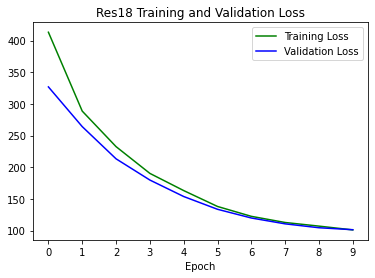

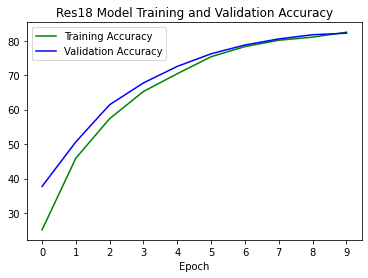

In [ ]:
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt
import numpy as np

#epochs = np.arange(0,10)


fig, axes = plt.subplots(1, 1)
axes.plot(tr_loss1,label='Training Loss',color='green')
axes.plot(val_loss1,label='Validation Loss',color='blue')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(tr_acc1,label='Training Accuracy',color='green')
axes.plot(val_acc1,label='Validation Accuracy',color='blue')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 Model Training and Validation Accuracy')
plt.show()


In [ ]:
def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc

In [ ]:
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

for epoch in range(start_epoch, start_epoch+10):
    test(epoch)
    scheduler.step()

Saving..


### C2: Experimenting with a different optimizer (5 points) 
Train the ResNet-18 model for 10 epochs on GPU using the Adam optimizer. Compare the performance with that of SGD. You should use the same default hyperparameters: learning rate 0.1 , weight decay 5e-4, and momentum 0.9. *The learning rate may need some adjustment: if the optimizer is overshooting the target, you can decrease the learning rate as needed.*



In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.1, weight_decay=5e-4)

In [ ]:
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
res2_tr_loss = []
res2_tr_acc = []
res2_val_loss = []
res2_val_acc = []

for epoch in range(start_epoch, start_epoch+10):
    tr_loss,tr_acc = train(epoch)
    val_loss, val_acc = train_val(epoch)
    res2_tr_loss.append(tr_loss)
    res2_tr_acc.append(tr_acc)
    res2_val_loss.append(val_loss)
    res2_val_acc.append(val_acc)
    scheduler.step()


Epoch: 0

Epoch: 0

Epoch: 1

Epoch: 1

Epoch: 2

Epoch: 2

Epoch: 3

Epoch: 3

Epoch: 4

Epoch: 4

Epoch: 5

Epoch: 5

Epoch: 6

Epoch: 6

Epoch: 7

Epoch: 7

Epoch: 8

Epoch: 8

Epoch: 9

Epoch: 9


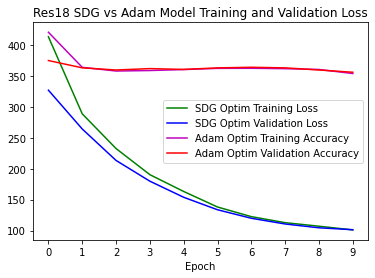

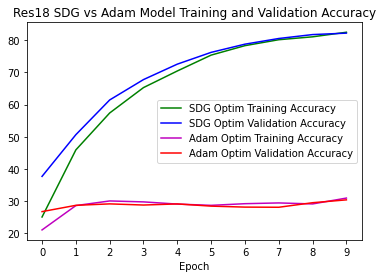

In [ ]:
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 1)
axes.plot(tr_loss1,label='SDG Optim Training Loss',color='green')
axes.plot(val_loss1,label='SDG Optim Validation Loss',color='blue')
axes.plot(res2_tr_loss,label='Adam Optim Training Accuracy',color='m')
axes.plot(res2_val_loss,label='Adam Optim Validation Accuracy',color='r')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 SDG vs Adam Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(tr_acc1,label='SDG Optim Training Accuracy',color='green')
axes.plot(val_acc1,label='SDG Optim Validation Accuracy',color='blue')
axes.plot(res2_tr_acc,label='Adam Optim Training Accuracy',color='m')
axes.plot(res2_val_acc,label='Adam Optim Validation Accuracy',color='r')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 SDG vs Adam Model Training and Validation Accuracy')
plt.show()

### C3: Experimenting without Batch Norm (5 points) 
What if you remove the batch norm layers from the ResNet-18 model? Compare the performance with the default SGD optimizer and the same hyper-parameters.




In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=5e-4)

In [ ]:
'''ResNet in PyTorch.
For Pre-activation ResNet, see 'preact_resnet.py'.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
https://github.com/kuangliu/pytorch-cifar/blob/master/main.py
'''
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False)
            )

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = self.conv3(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

#Defining resnet model from https://github.com/kuangliu/pytorch-cifar/tree/master/models

In [ ]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    # Save checkpoint.
    acc = 100.*correct/total
    state = {'net': net.state_dict(),
            'acc': acc,
             'loss': loss,
            'epoch': epoch}

    return train_loss,acc

In [ ]:
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
res3_tr_loss = []
res3_tr_acc = []
res3_val_loss = []
res3_val_acc = []

for epoch in range(start_epoch, start_epoch+10):
    tr_loss,tr_acc = train(epoch)
    val_loss, val_acc = train_val(epoch)
    res3_tr_loss.append(tr_loss)
    res3_tr_acc.append(tr_acc)
    res3_val_loss.append(val_loss)
    res3_val_acc.append(val_acc)
    scheduler.step()


Epoch: 0

Epoch: 0

Epoch: 1

Epoch: 1

Epoch: 2

Epoch: 2

Epoch: 3

Epoch: 3

Epoch: 4

Epoch: 4

Epoch: 5

Epoch: 5

Epoch: 6

Epoch: 6

Epoch: 7

Epoch: 7

Epoch: 8

Epoch: 8

Epoch: 9

Epoch: 9


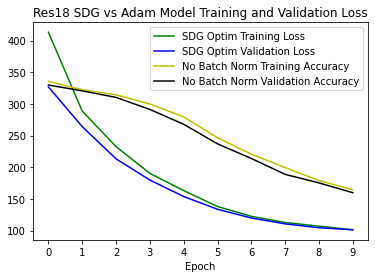

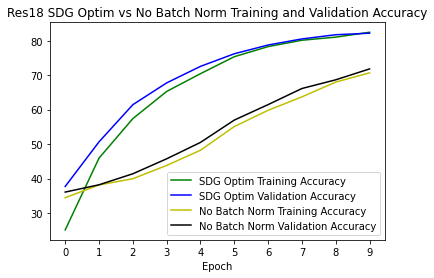

In [ ]:
#Plot the train/validation loss/accuracy against epoch number.
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 1)
axes.plot(tr_loss1,label='SDG Optim Training Loss',color='green')
axes.plot(val_loss1,label='SDG Optim Validation Loss',color='blue')
axes.plot(res3_tr_loss,label='No Batch Norm Training Accuracy',color='y')
axes.plot(res3_val_loss,label='No Batch Norm Validation Accuracy',color='k')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 SDG vs Adam Model Training and Validation Loss')
plt.show()


fig, axes = plt.subplots(1, 1)
axes.plot(tr_acc1,label='SDG Optim Training Accuracy',color='green')
axes.plot(val_acc1,label='SDG Optim Validation Accuracy',color='blue')
axes.plot(res3_tr_acc,label='No Batch Norm Training Accuracy',color='y')
axes.plot(res3_val_acc,label='No Batch Norm Validation Accuracy',color='k')
plt.legend()
plt.xticks(range(0,10))
plt.xlabel('Epoch')
plt.title('Res18 SDG Optim vs No Batch Norm Training and Validation Accuracy')
plt.show()

### Q1 points (2 points)
How many convolutional layers are in the ResNet-18 model?

  - There are 17 convolutional layers in the ResNet-18 Model. There is one first layer, and then 8 basic blocks of layers following. Each basic block contains two convolutional layers, so there are 1 + 2*8 convolutional layers in ResNet18.




### Q2 points (2 points)
What is the input dimension of the last linear layer?

  - The input dimension of the last linear layer is 512 x 10.
  - 'nn.Linear(512*block.expansion, num_classes)' = 512 (output dimension of 4th subgroup of basic blocks) * 1 (block.expansion) x 10 (num_classes for CIFAR10)

### Q3 points (6 points)
How many trainable parameters are there in the ResNet-18 model that you build (please show both the answer and the code that you use to count them)?

  - There are about 11M parameters.

In [ ]:
print(sum(p.numel() for p in net.parameters()))

NameError: ignored

# Problem 3 - *Training a simple chatbot using a seq-to-seq model* (30 points)
We will train a simple chatbot using movie scripts from the Cornell Movie Dialogs Corpus based on the [**PyTorch Chatbot
Tutorial**](https://pytorch.org/tutorials/beginner/chatbot_tutorial.html).
This tutorial allows you to train recurrent sequence-to-sequence model. You will learn the following concepts:

-   Handle loading and pre-processing of [**Cornell Movie-Dialogs Corpus dataset**](https://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html)
-   Implement a sequence-to-sequence model with  [**Luong attention mechanism(s)**](https://arxiv.org/abs/1508.04025)
-   Jointly train encoder and decoder models using mini-batches
-   Implement greedy-search decoding module
-   Interact with the trained chatbot

We will use the code in the tutorial as the starting code for the assignment:

1.  Read the tutorial, follow the instructions and copy & paste the code here to train and evaluate the Chatbot model. You should follow through the entire notebook to the end where you can interact with the Chatbot. (**10 points**)



In [ ]:
#https://pytorch.org/tutorials/beginner/chatbot_tutorial.html
#https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/44a84f8c1764dbf61662d306ff9ed43a/chatbot_tutorial.ipynb#scrollTo=ILn9uuKfbqwu

In [ ]:
%matplotlib inline

In [ ]:
# and put in a ``data/`` directory under the current directory.
#
# After that, let’s import some necessities.
#

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import torch
from torch.jit import script, trace
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math
import json


USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
corpus_name = "movie-corpus"
corpus = os.path.join("data", corpus_name)

def printLines(file, n=10):
    with open(file, 'rb') as datafile:
        lines = datafile.readlines()
    for line in lines[:n]:
        print(line)

printLines(os.path.join(corpus, "utterances.jsonl"))

b'{"id": "L1045", "conversation_id": "L1044", "text": "They do not!", "speaker": "u0", "meta": {"movie_id": "m0", "parsed": [{"rt": 1, "toks": [{"tok": "They", "tag": "PRP", "dep": "nsubj", "up": 1, "dn": []}, {"tok": "do", "tag": "VBP", "dep": "ROOT", "dn": [0, 2, 3]}, {"tok": "not", "tag": "RB", "dep": "neg", "up": 1, "dn": []}, {"tok": "!", "tag": ".", "dep": "punct", "up": 1, "dn": []}]}]}, "reply-to": "L1044", "timestamp": null, "vectors": []}\n'
b'{"id": "L1044", "conversation_id": "L1044", "text": "They do to!", "speaker": "u2", "meta": {"movie_id": "m0", "parsed": [{"rt": 1, "toks": [{"tok": "They", "tag": "PRP", "dep": "nsubj", "up": 1, "dn": []}, {"tok": "do", "tag": "VBP", "dep": "ROOT", "dn": [0, 2, 3]}, {"tok": "to", "tag": "TO", "dep": "dobj", "up": 1, "dn": []}, {"tok": "!", "tag": ".", "dep": "punct", "up": 1, "dn": []}]}]}, "reply-to": null, "timestamp": null, "vectors": []}\n'
b'{"id": "L985", "conversation_id": "L984", "text": "I hope so.", "speaker": "u0", "meta": {

In [ ]:
# Splits each line of the file to create lines and conversations
def loadLinesAndConversations(fileName):
    lines = {}
    conversations = {}
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            lineJson = json.loads(line)
            # Extract fields for line object
            lineObj = {}
            lineObj["lineID"] = lineJson["id"]
            lineObj["characterID"] = lineJson["speaker"]
            lineObj["text"] = lineJson["text"]
            lines[lineObj['lineID']] = lineObj

            # Extract fields for conversation object
            if lineJson["conversation_id"] not in conversations:
                convObj = {}
                convObj["conversationID"] = lineJson["conversation_id"]
                convObj["movieID"] = lineJson["meta"]["movie_id"]
                convObj["lines"] = [lineObj]
            else:
                convObj = conversations[lineJson["conversation_id"]]
                convObj["lines"].insert(0, lineObj)
            conversations[convObj["conversationID"]] = convObj

    return lines, conversations


# Extracts pairs of sentences from conversations
def extractSentencePairs(conversations):
    qa_pairs = []
    for conversation in conversations.values():
        # Iterate over all the lines of the conversation
        for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
            inputLine = conversation["lines"][i]["text"].strip()
            targetLine = conversation["lines"][i+1]["text"].strip()
            # Filter wrong samples (if one of the lists is empty)
            if inputLine and targetLine:
                qa_pairs.append([inputLine, targetLine])
    return qa_pairs

In [ ]:
# Define path to new file
datafile = os.path.join(corpus, "formatted_movie_lines.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

# Initialize lines dict and conversations dict
lines = {}
conversations = {}
# Load lines and conversations
print("\nProcessing corpus into lines and conversations...")
lines, conversations = loadLinesAndConversations(os.path.join(corpus, "utterances.jsonl"))

# Write new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter, lineterminator='\n')
    for pair in extractSentencePairs(conversations):
        writer.writerow(pair)

# Print a sample of lines
print("\nSample lines from file:")
printLines(datafile)


Processing corpus into lines and conversations...

Writing newly formatted file...

Sample lines from file:
b'They do to!\tThey do not!\n'
b'She okay?\tI hope so.\n'
b"Wow\tLet's go.\n"
b'"I\'m kidding.  You know how sometimes you just become this ""persona""?  And you don\'t know how to quit?"\tNo\n'
b"No\tOkay -- you're gonna need to learn how to lie.\n"
b"I figured you'd get to the good stuff eventually.\tWhat good stuff?\n"
b'What good stuff?\t"The ""real you""."\n'
b'"The ""real you""."\tLike my fear of wearing pastels?\n'
b'do you listen to this crap?\tWhat crap?\n'
b"What crap?\tMe.  This endless ...blonde babble. I'm like, boring myself.\n"


In [ ]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Count default tokens

        for word in keep_words:
            self.addWord(word)

In [ ]:
MAX_LENGTH = 10  # Maximum sentence length to consider

# Turn a Unicode string to plain ASCII, thanks to
# https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

# Read query/response pairs and return a voc object
def readVocs(datafile, corpus_name):
    print("Reading lines...")
    # Read the file and split into lines
    lines = open(datafile, encoding='utf-8').\
        read().strip().split('\n')
    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    voc = Voc(corpus_name)
    return voc, pairs

# Returns True iff both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    # Input sequences need to preserve the last word for EOS token
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH

# Filter pairs using filterPair condition
def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

# Using the functions defined above, return a populated voc object and pairs list
def loadPrepareData(corpus, corpus_name, datafile, save_dir):
    print("Start preparing training data ...")
    voc, pairs = readVocs(datafile, corpus_name)
    print("Read {!s} sentence pairs".format(len(pairs)))
    pairs = filterPairs(pairs)
    print("Trimmed to {!s} sentence pairs".format(len(pairs)))
    print("Counting words...")
    for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])
    print("Counted words:", voc.num_words)
    return voc, pairs


# Load/Assemble voc and pairs
save_dir = os.path.join("data", "save")
voc, pairs = loadPrepareData(corpus, corpus_name, datafile, save_dir)
# Print some pairs to validate
print("\npairs:")
for pair in pairs[:10]:
    print(pair)

Start preparing training data ...
Reading lines...
Read 221282 sentence pairs
Trimmed to 64313 sentence pairs
Counting words...
Counted words: 18082

pairs:
['they do to !', 'they do not !']
['she okay ?', 'i hope so .']
['wow', 'let s go .']
['what good stuff ?', 'the real you .']
['the real you .', 'like my fear of wearing pastels ?']
['do you listen to this crap ?', 'what crap ?']
['well no . . .', 'then that s all you had to say .']
['then that s all you had to say .', 'but']
['but', 'you always been this selfish ?']
['have fun tonight ?', 'tons']


In [ ]:
MIN_COUNT = 3    # Minimum word count threshold for trimming

def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs


# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

keep_words 7833 / 18079 = 0.4333
Trimmed from 64313 pairs to 53131, 0.8261 of total


In [ ]:
### if zeroPadding isn't working, clear and restart runtime.

def indexesFromSentence(voc, sentence):
    return [voc.word2index[word] for word in sentence.split(' ')] + [EOS_token]


def zeroPadding(l, fillvalue=PAD_token):
    return list(itertools.zip_longest(*l, fillvalue=fillvalue))

def binaryMatrix(l, value=PAD_token):
    m = []
    for i, seq in enumerate(l):
        m.append([])
        for token in seq:
            if token == PAD_token:
                m[i].append(0)
            else:
                m[i].append(1)
    return m

# Returns padded input sequence tensor and lengths
def inputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    padVar = torch.LongTensor(padList)
    return padVar, lengths

# Returns padded target sequence tensor, padding mask, and max target length
def outputVar(l, voc):
    indexes_batch = [indexesFromSentence(voc, sentence) for sentence in l]
    max_target_len = max([len(indexes) for indexes in indexes_batch])
    padList = zeroPadding(indexes_batch)
    mask = binaryMatrix(padList)
    mask = torch.BoolTensor(mask)
    padVar = torch.LongTensor(padList)
    return padVar, mask, max_target_len

# Returns all items for a given batch of pairs
def batch2TrainData(voc, pair_batch):
    pair_batch.sort(key=lambda x: len(x[0].split(" ")), reverse=True)
    input_batch, output_batch = [], []
    for pair in pair_batch:
        input_batch.append(pair[0])
        output_batch.append(pair[1])
    inp, lengths = inputVar(input_batch, voc)
    output, mask, max_target_len = outputVar(output_batch, voc)
    return inp, lengths, output, mask, max_target_len


# Example for validation
small_batch_size = 5
batches = batch2TrainData(voc, [random.choice(pairs) for _ in range(small_batch_size)])
input_variable, lengths, target_variable, mask, max_target_len = batches

print("input_variable:", input_variable)
print("lengths:", lengths)
print("target_variable:", target_variable)
print("mask:", mask)
print("max_target_len:", max_target_len)

input_variable: tensor([[ 104,  103, 1229,   62,  254],
        [1012,    4,   11, 1911, 1629],
        [ 118,   24,  200,   14,  109],
        [1012,   25,  161,   14,  861],
        [   5,    5, 4454,   14,   14],
        [  48, 2516,   14,    2,    2],
        [  14,   13,    2,    0,    0],
        [  14,  580,    0,    0,    0],
        [  14,   10,    0,    0,    0],
        [   2,    2,    0,    0,    0]])
lengths: tensor([10, 10,  7,  6,  6])
target_variable: tensor([[1587,  499,    7,   36,  234],
        [ 269,   11,  112, 3551,   14],
        [  84,  257,   14,    5,   14],
        [   2,   20,    2,   24,   14],
        [   0,  330,    0,   10,   24],
        [   0,   85,    0,    2,   64],
        [   0,   14,    0,    0, 1178],
        [   0,    2,    0,    0, 3328],
        [   0,    0,    0,    0,   14],
        [   0,    0,    0,    0,    2]])
mask: tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0):
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding

        # Initialize GRU; the input_size and hidden_size params are both set to 'hidden_size'
        #   because our input size is a word embedding with number of features == hidden_size
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        # Convert word indexes to embeddings
        embedded = self.embedding(input_seq)
        # Pack padded batch of sequences for RNN module
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        # Forward pass through GRU
        outputs, hidden = self.gru(packed, hidden)
        # Unpack padding
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs)
        # Sum bidirectional GRU outputs
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:]
        # Return output and final hidden state
        return outputs, hidden

In [ ]:
# Luong attention layer
class Attn(nn.Module):
    def __init__(self, method, hidden_size):
        super(Attn, self).__init__()
        self.method = method
        if self.method not in ['dot', 'general', 'concat']:
            raise ValueError(self.method, "is not an appropriate attention method.")
        self.hidden_size = hidden_size
        if self.method == 'general':
            self.attn = nn.Linear(self.hidden_size, hidden_size)
        elif self.method == 'concat':
            self.attn = nn.Linear(self.hidden_size * 2, hidden_size)
            self.v = nn.Parameter(torch.FloatTensor(hidden_size))

    def dot_score(self, hidden, encoder_output):
        return torch.sum(hidden * encoder_output, dim=2)

    def general_score(self, hidden, encoder_output):
        energy = self.attn(encoder_output)
        return torch.sum(hidden * energy, dim=2)

    def concat_score(self, hidden, encoder_output):
        energy = self.attn(torch.cat((hidden.expand(encoder_output.size(0), -1, -1), encoder_output), 2)).tanh()
        return torch.sum(self.v * energy, dim=2)

    def forward(self, hidden, encoder_outputs):
        # Calculate the attention weights (energies) based on the given method
        if self.method == 'general':
            attn_energies = self.general_score(hidden, encoder_outputs)
        elif self.method == 'concat':
            attn_energies = self.concat_score(hidden, encoder_outputs)
        elif self.method == 'dot':
            attn_energies = self.dot_score(hidden, encoder_outputs)

        # Transpose max_length and batch_size dimensions
        attn_energies = attn_energies.t()

        # Return the softmax normalized probability scores (with added dimension)
        return F.softmax(attn_energies, dim=1).unsqueeze(1)

In [ ]:
class LuongAttnDecoderRNN(nn.Module):
    def __init__(self, attn_model, embedding, hidden_size, output_size, n_layers=1, dropout=0.1):
        super(LuongAttnDecoderRNN, self).__init__()

        # Keep for reference
        self.attn_model = attn_model
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        # Define layers
        self.embedding = embedding
        self.embedding_dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

        self.attn = Attn(attn_model, hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        # Note: we run this one step (word) at a time
        # Get embedding of current input word
        embedded = self.embedding(input_step)
        embedded = self.embedding_dropout(embedded)
        # Forward through unidirectional GRU
        rnn_output, hidden = self.gru(embedded, last_hidden)
        # Calculate attention weights from the current GRU output
        attn_weights = self.attn(rnn_output, encoder_outputs)
        # Multiply attention weights to encoder outputs to get new "weighted sum" context vector
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1))
        # Concatenate weighted context vector and GRU output using Luong eq. 5
        rnn_output = rnn_output.squeeze(0)
        context = context.squeeze(1)
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = torch.tanh(self.concat(concat_input))
        # Predict next word using Luong eq. 6
        output = self.out(concat_output)
        output = F.softmax(output, dim=1)
        # Return output and final hidden state
        return output, hidden

In [ ]:
def maskNLLLoss(inp, target, mask):
    nTotal = mask.sum()
    crossEntropy = -torch.log(torch.gather(inp, 1, target.view(-1, 1)).squeeze(1))
    loss = crossEntropy.masked_select(mask).mean()
    loss = loss.to(device)
    return loss, nTotal.item()

In [ ]:
def train(input_variable, lengths, target_variable, mask, max_target_len, encoder, decoder, embedding,
          encoder_optimizer, decoder_optimizer, batch_size, clip, max_length=MAX_LENGTH):

    # Zero gradients
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # Set device options
    input_variable = input_variable.to(device)
    target_variable = target_variable.to(device)
    mask = mask.to(device)
    # Lengths for rnn packing should always be on the cpu
    lengths = lengths.to("cpu")

    # Initialize variables
    loss = 0
    print_losses = []
    n_totals = 0

    # Forward pass through encoder
    encoder_outputs, encoder_hidden = encoder(input_variable, lengths)

    # Create initial decoder input (start with SOS tokens for each sentence)
    decoder_input = torch.LongTensor([[SOS_token for _ in range(batch_size)]])
    decoder_input = decoder_input.to(device)

    # Set initial decoder hidden state to the encoder's final hidden state
    decoder_hidden = encoder_hidden[:decoder.n_layers]

    # Determine if we are using teacher forcing this iteration
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    # Forward batch of sequences through decoder one time step at a time
    if use_teacher_forcing:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # Teacher forcing: next input is current target
            decoder_input = target_variable[t].view(1, -1)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal
    else:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            # No teacher forcing: next input is decoder's own current output
            _, topi = decoder_output.topk(1)
            decoder_input = torch.LongTensor([[topi[i][0] for i in range(batch_size)]])
            decoder_input = decoder_input.to(device)
            # Calculate and accumulate loss
            mask_loss, nTotal = maskNLLLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

    # Perform backpropatation
    loss.backward()

    # Clip gradients: gradients are modified in place
    _ = nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    # Adjust model weights
    encoder_optimizer.step()
    decoder_optimizer.step()

    return sum(print_losses) / n_totals

In [ ]:
def trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer, embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size, print_every, save_every, clip, corpus_name, loadFilename):

    # Load batches for each iteration
    training_batches = [batch2TrainData(voc, [random.choice(pairs) for _ in range(batch_size)])
                      for _ in range(n_iteration)]

    # Initializations
    print('Initializing ...')
    start_iteration = 1
    print_loss = 0
    if loadFilename:
        start_iteration = checkpoint['iteration'] + 1

    # Training loop
    print("Training...")
    for iteration in range(start_iteration, n_iteration + 1):
        training_batch = training_batches[iteration - 1]
        # Extract fields from batch
        input_variable, lengths, target_variable, mask, max_target_len = training_batch

        # Run a training iteration with batch
        loss = train(input_variable, lengths, target_variable, mask, max_target_len, encoder,
                     decoder, embedding, encoder_optimizer, decoder_optimizer, batch_size, clip)
        print_loss += loss

        # Print progress
        if iteration % print_every == 0:
            print_loss_avg = print_loss / print_every
            print("Iteration: {}; Percent complete: {:.1f}%; Average loss: {:.4f}".format(iteration, iteration / n_iteration * 100, print_loss_avg))
            print_loss = 0

        # Save checkpoint
        if (iteration % save_every == 0):
            directory = os.path.join(save_dir, model_name, corpus_name, '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size))
            if not os.path.exists(directory):
                os.makedirs(directory)
            torch.save({
                'iteration': iteration,
                'en': encoder.state_dict(),
                'de': decoder.state_dict(),
                'en_opt': encoder_optimizer.state_dict(),
                'de_opt': decoder_optimizer.state_dict(),
                'loss': loss,
                'voc_dict': voc.__dict__,
                'embedding': embedding.state_dict()
            }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

In [ ]:
class GreedySearchDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(GreedySearchDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, input_length, max_length):
        # Forward input through encoder model
        encoder_outputs, encoder_hidden = self.encoder(input_seq, input_length)
        # Prepare encoder's final hidden layer to be first hidden input to the decoder
        decoder_hidden = encoder_hidden[:decoder.n_layers]
        # Initialize decoder input with SOS_token
        decoder_input = torch.ones(1, 1, device=device, dtype=torch.long) * SOS_token
        # Initialize tensors to append decoded words to
        all_tokens = torch.zeros([0], device=device, dtype=torch.long)
        all_scores = torch.zeros([0], device=device)
        # Iteratively decode one word token at a time
        for _ in range(max_length):
            # Forward pass through decoder
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden, encoder_outputs)
            # Obtain most likely word token and its softmax score
            decoder_scores, decoder_input = torch.max(decoder_output, dim=1)
            # Record token and score
            all_tokens = torch.cat((all_tokens, decoder_input), dim=0)
            all_scores = torch.cat((all_scores, decoder_scores), dim=0)
            # Prepare current token to be next decoder input (add a dimension)
            decoder_input = torch.unsqueeze(decoder_input, 0)
        # Return collections of word tokens and scores
        return all_tokens, all_scores

In [ ]:
def evaluate(encoder, decoder, searcher, voc, sentence, max_length=MAX_LENGTH):
    ### Format input sentence as a batch
    # words -> indexes
    indexes_batch = [indexesFromSentence(voc, sentence)]
    # Create lengths tensor
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    # Transpose dimensions of batch to match models' expectations
    input_batch = torch.LongTensor(indexes_batch).transpose(0, 1)
    # Use appropriate device
    input_batch = input_batch.to(device)
    lengths = lengths.to("cpu")
    # Decode sentence with searcher
    tokens, scores = searcher(input_batch, lengths, max_length)
    # indexes -> words
    decoded_words = [voc.index2word[token.item()] for token in tokens]
    return decoded_words


def evaluateInput(encoder, decoder, searcher, voc):
    input_sentence = ''
    while(1):
        try:
            # Get input sentence
            input_sentence = input('> ')
            # Check if it is quit case
            if input_sentence == 'q' or input_sentence == 'quit': break
            # Normalize sentence
            input_sentence = normalizeString(input_sentence)
            # Evaluate sentence
            output_words = evaluate(encoder, decoder, searcher, voc, input_sentence)
            # Format and print response sentence
            output_words[:] = [x for x in output_words if not (x == 'EOS' or x == 'PAD')]
            print('Bot:', ' '.join(output_words))

        except KeyError:
            print("Error: Encountered unknown word.")

In [ ]:
# Configure models
model_name = 'cb_model'
attn_model = 'dot'
#attn_model = 'general'
#attn_model = 'concat'
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.1
batch_size = 64

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 4000
#loadFilename = os.path.join(save_dir, model_name, corpus_name,
#                            '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size),
#                            '{}_checkpoint.tar'.format(checkpoint_iter))


# Load model if a loadFilename is provided
if loadFilename:
    # If loading on same machine the model was trained on
    checkpoint = torch.load(loadFilename)
    # If loading a model trained on GPU to CPU
    #checkpoint = torch.load(loadFilename, map_location=torch.device('cpu'))
    encoder_sd = checkpoint['en']
    decoder_sd = checkpoint['de']
    encoder_optimizer_sd = checkpoint['en_opt']
    decoder_optimizer_sd = checkpoint['de_opt']
    embedding_sd = checkpoint['embedding']
    voc.__dict__ = checkpoint['voc_dict']


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


In [ ]:
# Re-Configure training/optimization for gradient clip = 50, teacher ratio = 1.0
clip = 50.0
teacher_forcing_ratio = 1.0
learning_rate = 0.0001
decoder_learning_ratio = 5.0
n_iteration = 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have cuda, configure cuda to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 4.6781
Iteration: 2; Percent complete: 0.1%; Average loss: 4.5059
Iteration: 3; Percent complete: 0.1%; Average loss: 4.5361
Iteration: 4; Percent complete: 0.1%; Average loss: 4.6089
Iteration: 5; Percent complete: 0.1%; Average loss: 4.4658
Iteration: 6; Percent complete: 0.1%; Average loss: 4.6115
Iteration: 7; Percent complete: 0.2%; Average loss: 4.4984
Iteration: 8; Percent complete: 0.2%; Average loss: 4.3865
Iteration: 9; Percent complete: 0.2%; Average loss: 4.7575
Iteration: 10; Percent complete: 0.2%; Average loss: 4.5236
Iteration: 11; Percent complete: 0.3%; Average loss: 4.4022
Iteration: 12; Percent complete: 0.3%; Average loss: 4.2972
Iteration: 13; Percent complete: 0.3%; Average loss: 4.4235
Iteration: 14; Percent complete: 0.4%; Average loss: 4.4381
Iteration: 15; Percent complete: 0.4%; Average loss: 4.4478
Iteration: 16; Percent complete: 0.4%

In [ ]:
# Set dropout layers to eval mode
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)



In [ ]:
evaluateInput(encoder, decoder, searcher, voc)

> good morning
Bot: hey . . . . .
> how are you?
Bot: i know . . . .
> this is cool
Bot: i m not . . . ?
> you are cool
Bot: i m not . . . ?
> not what?
Bot: i m not . . . .
> ?
Bot: i m not . . . .
> hi
Bot: what ? ? ? ? ?
> lol
Error: Encountered unknown word.


KeyboardInterrupt: ignored

In [ ]:
# Begin chatting (uncomment and run the following line to begin)
#evaluateInput(encoder, decoder, searcher, voc)

#After first run, only 100 iterations. Clearly that did not work.

> hi
Bot: i you you ? . . .
> i don't think i trained you long enough
Bot: i you you ? . . .
> uh oh
Bot: i you you ? . . .
> hi
Bot: i you you ? . . .
> say something else
Bot: i you you ? . . .


KeyboardInterrupt: ignored

In [ ]:
# Begin chatting (uncomment and run the following line to begin)
#evaluateInput(encoder, decoder, searcher, voc)

#After second run with 1000 iterations and learning rate increased to 0.01
#clearly this didn't work either. Learning rate is too high! Average loss was nan after the first few iterations.

> hi friend
Bot: 
> oh no
Bot: 
> well this didn't work
Bot: 
> yikes
Error: Encountered unknown word.
> talk to meeeeee
Error: Encountered unknown word.
> my name is alie
Error: Encountered unknown word.
> what is your name
Bot: 
> Hi bot
Error: Encountered unknown word.


KeyboardInterrupt: ignored

2.  Answer the following questions: 
    - What's the purpose of gradient clipping? What if I don't use it? (**3 points**)
      \
      The purpose of gradient clipping is to prevent exploding gradients, where gradients become too big and errors accumulate causing the network to be unstable. If you don't use gradient clipping your network will be unstable and unable to learn. 

    - What is teacher forcing? What might happen if I set the teacher forcing ratio too high or too low? (**3 points**)
      \
      Teacher forcing is an algorithm to train weights in an RNN by feeding ground truth samples to the algorithm as inputs after every step, rather than the previous step's output. If the teacher forcing ratio is too high the model may not generalize beyond the training sample. If the model is dependent on too much 'ground truth' information from the training data, the model will not perform well in new contexts. If the ratio is too low, the model will take too long to train. The model has poor predictions at the beginning of training and without teacher training the model will not be able to learn as efficiently because the errors accumulate too much. 

    - Why do we want to use the "attention mechanism" instead of a fixed context vector in a decoder? (**4 points**)
    \
    Attention mechanisms in decoders are important because they allow decoders to attend to salient information in a vector. In a fixed context vector a decoder may not be able to differentiate between relevant contexts to the whole string and smaller contexts between substrings. The model will not perform as well. Attention mechanisms get significant information from sequences and weight them. For each timestep, attention mechanisms attempt to generate a specific context vector. This causes the decoder to 'pay attention to' relevant features rather than being influenced by irrelevant contexts in long fixed content vectors. 

3.  Consider the following grid of hyperparameters: (**10 points**)
    -   Clip: \[0, 25, 50, 100\]
    -   teacher_forcing_ratio: \[0, 0.5, 1.0\]
    -   attn_model: \['dot', 'general', 'concat'\]

    Manually pick 2-3 combinations that are different from the above to re-train the model and report the results. State the rationale why you think a combination may increase or decrease the model's performance or change the Chatbot's behaviors. Test your hypothesis using evidence.

### Combination 1
clip = 0 \
teacher_forcing_ratio = 0 \
attn_model = 'general'

Rationale: I qant to see impact of NO gradient clipping and NO teacher forcing. Using 'general' aligment function was shown to work best for local attention (table 4 of Luong paper). 

I think this will drastically decrease my models performance. Without gradient clipping and teacher forcing, the model may be unstable stuck in exploding gradients where model errors are not scaled and can accumulate and the model may be 




read more about attention forcing here - https://openreview.net/pdf?id=rJe5_CNtPB
https://arxiv.org/pdf/1508.04025.pdf


In [ ]:
# Re-Configure model to have attn_model = 'general' alignment function
model_name = 'cb_model'
#attn_model = 'dot'
attn_model = 'general'
#attn_model = 'concat'
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.1
batch_size = 64

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 4000


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


In [ ]:
# Re- Configure training/optimization to have gradient clip = 0, teacher forcing ratio = 0
clip = 0
teacher_forcing_ratio = 0 #
learning_rate = 0.0001 #lowering learning rate again because bot did not work
decoder_learning_ratio = 5.0
n_iteration = 1000 #Changed this to be lower - was taking hours to run 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have cuda, configure cuda to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.1%; Average loss: 8.9828
Iteration: 2; Percent complete: 0.2%; Average loss: 8.9814
Iteration: 3; Percent complete: 0.3%; Average loss: 8.9733
Iteration: 4; Percent complete: 0.4%; Average loss: 8.9832
Iteration: 5; Percent complete: 0.5%; Average loss: 8.9826
Iteration: 6; Percent complete: 0.6%; Average loss: 8.9821
Iteration: 7; Percent complete: 0.7%; Average loss: 8.9808
Iteration: 8; Percent complete: 0.8%; Average loss: 8.9817
Iteration: 9; Percent complete: 0.9%; Average loss: 8.9765
Iteration: 10; Percent complete: 1.0%; Average loss: 8.9757
Iteration: 11; Percent complete: 1.1%; Average loss: 8.9801
Iteration: 12; Percent complete: 1.2%; Average loss: 8.9791
Iteration: 13; Percent complete: 1.3%; Average loss: 8.9806
Iteration: 14; Percent complete: 1.4%; Average loss: 8.9801
Iteration: 15; Percent complete: 1.5%; Average loss: 8.9765
Iteration: 16; Percent complete: 1.6%

In [ ]:
#Testing new model 
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)



In [ ]:
evaluateInput(encoder, decoder, searcher, voc)

> hi
Bot: staying bored h h steph gwpaapa piss laplante hamlet hamlet
> oh boy this didn't work did it
Bot: paycheck paycheck paycheck tootin paycheck massachussettans divorce divorce massachussettans divorce
> lmao
Error: Encountered unknown word.


KeyboardInterrupt: ignored

### Combination 1 worked terribly.

Removing gradient clip and teacher forcing worsens the model considerably. Also setting attn_model to 'general' worsened the model. I am going to retry combination 1 with 'dot' and see if it gets better to determine which attn_model I want to continue with. 

In [ ]:
# Re-Configure model to have attn_model = 'general' alignment function
model_name = 'cb_model'
attn_model = 'dot'
#attn_model = 'general'
#attn_model = 'concat'
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.1
batch_size = 64

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 4000


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


In [ ]:
# COMBINATION 1B - JUST CHANGING ATTN_MODEL BACK TO 'DOT'
clip = 0
teacher_forcing_ratio = 0 #
learning_rate = 0.0001 #lowering learning rate again because bot did not work
decoder_learning_ratio = 5.0
n_iteration = 1000 #Changed this to be lower - was taking hours to run 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have cuda, configure cuda to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.1%; Average loss: 8.9682
Iteration: 2; Percent complete: 0.2%; Average loss: 8.9701
Iteration: 3; Percent complete: 0.3%; Average loss: 8.9681
Iteration: 4; Percent complete: 0.4%; Average loss: 8.9718
Iteration: 5; Percent complete: 0.5%; Average loss: 8.9645
Iteration: 6; Percent complete: 0.6%; Average loss: 8.9665
Iteration: 7; Percent complete: 0.7%; Average loss: 8.9666
Iteration: 8; Percent complete: 0.8%; Average loss: 8.9646
Iteration: 9; Percent complete: 0.9%; Average loss: 8.9683
Iteration: 10; Percent complete: 1.0%; Average loss: 8.9695
Iteration: 11; Percent complete: 1.1%; Average loss: 8.9703
Iteration: 12; Percent complete: 1.2%; Average loss: 8.9687
Iteration: 13; Percent complete: 1.3%; Average loss: 8.9723
Iteration: 14; Percent complete: 1.4%; Average loss: 8.9699
Iteration: 15; Percent complete: 1.5%; Average loss: 8.9683
Iteration: 16; Percent complete: 1.6%

In [ ]:
#Testing new model (clip = 0, tr ratio = 0, attn = 'general')
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)



In [ ]:
evaluateInput(encoder, decoder, searcher, voc)

> hi
Bot: takes yours yours yeah weiss yours yours yours seemed bend
> still bad i see
Bot: kidnapping kidnapping kidnapping free kidnapping health kidnapping muffin puke grows


KeyboardInterrupt: ignored

### Combination 1B also worked terribly.

Removing gradient clip and teacher forcing worsens the model considerably. Also setting attn_model to 'general' worsened the model. attn_model = 'dot' did not improve performance, but the final average loss was slightly lower, so I will continue with attn_model = 'dot' going forward.

In [ ]:
# Begin chatting (uncomment and run the following line to begin)
#evaluateInput(encoder, decoder, searcher, voc)

### Combination 2

clip = 50 \
teacher_forcing_ratio = 0 \
attn_model = 'dot'


Rationale: I am keeping teacher forcing the same as combination 1 so that I can test how increasing gradient clipping impacts my chatbot performance. I am changing the alignment function back to 'dot' because that was shown to work best for global attention. 

I think this will increase performance because the model won't have to overcome exploding gradients, and the 'dot' alignment function should generalize better for global attention, which in this case may be important for performance.  

In [ ]:
# Re-Re-Configure model to have attn_model = 'dot' alignment function
model_name = 'cb_model'
attn_model = 'dot'
#attn_model = 'general'
#attn_model = 'concat'
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.1
batch_size = 64

# Set checkpoint to load from; set to None if starting from scratch
loadFilename = None
checkpoint_iter = 4000
#loadFilename = os.path.join(save_dir, model_name, corpus_name,
#                            '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size),
#                            '{}_checkpoint.tar'.format(checkpoint_iter))


# Load model if a loadFilename is provided
if loadFilename:
    # If loading on same machine the model was trained on
    checkpoint = torch.load(loadFilename)
    # If loading a model trained on GPU to CPU
    #checkpoint = torch.load(loadFilename, map_location=torch.device('cpu'))
    encoder_sd = checkpoint['en']
    decoder_sd = checkpoint['de']
    encoder_optimizer_sd = checkpoint['en_opt']
    decoder_optimizer_sd = checkpoint['de_opt']
    embedding_sd = checkpoint['embedding']
    voc.__dict__ = checkpoint['voc_dict']


print('Building encoder and decoder ...')
# Initialize word embeddings
embedding = nn.Embedding(voc.num_words, hidden_size)
if loadFilename:
    embedding.load_state_dict(embedding_sd)
# Initialize encoder & decoder models
encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = LuongAttnDecoderRNN(attn_model, embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)
if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)
# Use appropriate device
encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


In [ ]:
# Re- Configure training/optimization to have gradient clip = 50, teacher forcing ratio = 0
clip = 50
teacher_forcing_ratio = 0 #
learning_rate = 0.0001 #making this higher so model doesn't take hours to run
decoder_learning_ratio = 5.0
n_iteration = 1000 #Changed this to be lower - was taking hours to run 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have cuda, configure cuda to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.1%; Average loss: 8.9648
Iteration: 2; Percent complete: 0.2%; Average loss: 8.8811
Iteration: 3; Percent complete: 0.3%; Average loss: 8.6130
Iteration: 4; Percent complete: 0.4%; Average loss: 8.1766
Iteration: 5; Percent complete: 0.5%; Average loss: 7.7132
Iteration: 6; Percent complete: 0.6%; Average loss: 7.1591
Iteration: 7; Percent complete: 0.7%; Average loss: 6.9109
Iteration: 8; Percent complete: 0.8%; Average loss: 6.6786
Iteration: 9; Percent complete: 0.9%; Average loss: 6.5655
Iteration: 10; Percent complete: 1.0%; Average loss: 6.3654
Iteration: 11; Percent complete: 1.1%; Average loss: 6.0915
Iteration: 12; Percent complete: 1.2%; Average loss: 5.5356
Iteration: 13; Percent complete: 1.3%; Average loss: 5.7615
Iteration: 14; Percent complete: 1.4%; Average loss: 5.7629
Iteration: 15; Percent complete: 1.5%; Average loss: 5.3664
Iteration: 16; Percent complete: 1.6%

In [ ]:
#Testing new model (clip = 50, tr ratio = 0, attn = 'dot')
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)


In [ ]:
# Begin chatting (uncomment and run the following line to begin)
evaluateInput(encoder, decoder, searcher, voc)

> hi
Bot: hi . .
> wow you are working
Bot: i . .
> what is your name
Bot: i . . . .
> yes
Bot: i ? .
> i
Bot: you .
> me
Bot: you . .
> hi
Bot: hi . .
> how are you
Bot: i . .
> why do you like saying i
Bot: i i . . .


KeyboardInterrupt: ignored

### Combination 2 improved slightly!

Adding gradient clipping back into the model improved its performance considerably from not having clipping. I am now adding in teacher forcing.

### Combination 3

clip = 50 \
teacher_forcing_ratio = 1.0 \
attn_model = 'dot'

Rationale: I want to change just the teacher forcing ratio from the previous combination so I can see how inserting ground truth information into model training changes my chatbox performance. I think this will increase performance because the model will not have to rely solely on outputs full of errors to train. The model will be fed ground truth information as well, so the model will train faster and hopefully outperform my previous models with no teacher forcing ratio.

In [ ]:
# Configure training/optimization
clip = 25.0
teacher_forcing_ratio = 0.5 #
learning_rate = 0.0001 #making this higher so model doesn't take hours to run
decoder_learning_ratio = 5.0
n_iteration = 4000 #Changed this to be lower - was taking hours to run at 4000
print_every = 1
save_every = 500

# Ensure dropout layers are in train mode
encoder.train()
decoder.train()

# Initialize optimizers
print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

# If you have cuda, configure cuda to call
for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

# Run training iterations
print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, n_iteration, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Initializing ...
Training...
Iteration: 1; Percent complete: 0.0%; Average loss: 2.7547
Iteration: 2; Percent complete: 0.1%; Average loss: 6.2955
Iteration: 3; Percent complete: 0.1%; Average loss: 5.5691
Iteration: 4; Percent complete: 0.1%; Average loss: 5.8503
Iteration: 5; Percent complete: 0.1%; Average loss: 2.6432
Iteration: 6; Percent complete: 0.1%; Average loss: 5.1130
Iteration: 7; Percent complete: 0.2%; Average loss: 2.7391
Iteration: 8; Percent complete: 0.2%; Average loss: 5.1709
Iteration: 9; Percent complete: 0.2%; Average loss: 2.4672
Iteration: 10; Percent complete: 0.2%; Average loss: 2.7829
Iteration: 11; Percent complete: 0.3%; Average loss: 5.0467
Iteration: 12; Percent complete: 0.3%; Average loss: 2.7230
Iteration: 13; Percent complete: 0.3%; Average loss: 2.4889
Iteration: 14; Percent complete: 0.4%; Average loss: 5.1219
Iteration: 15; Percent complete: 0.4%; Average loss: 5.2382
Iteration: 16; Percent complete: 0.4%

In [ ]:
#Testing new model (clip = 50, tr ratio = 1.0, attn = 'dot')
encoder.eval()
decoder.eval()

# Initialize search module
searcher = GreedySearchDecoder(encoder, decoder)


In [ ]:
# Begin chatting (uncomment and run the following line to begin)
evaluateInput(encoder, decoder, searcher, voc)

> hi
Bot: hi . ?
> how are you?
Bot: fine . .
> what is your name?
Bot: i . . .
> why do you get stuck on i?
Bot: i m it on it .
> haha
Error: Encountered unknown word.
> what is your name
Bot: i !
> your name is i?
Bot: i . . .
> hi i
Bot: hello . .
> how are you i?
Bot: i m
> well?
Bot: she is .
> she is what?
Bot: she s she . she . .


KeyboardInterrupt: ignored

### Combination 3 was the best of the ones I tried.

Adding teacher forcing = 0.5 back into the model improved the model considerably. The bot and I were able to have a fun conversation. This shows the importance of both gradient clipping and teacher forcing!

Note: The model ran slower with the addition of teacher forcing = 0.5.

In [ ]:
#https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/44a84f8c1764dbf61662d306ff9ed43a/chatbot_tutorial.ipynb#scrollTo=ILn9uuKfbqwu